# 05 - Modeling

In [1]:
import pandas as pd
from pathlib import Path

PROCESSED_DIR = Path("../data/processed")  # или как у тебя структура
df = pd.read_csv(PROCESSED_DIR / "rentals_features.csv")
print(df.shape)
df.head()

(89, 27)


,title,price,sqft,bedrooms,bathrooms,address,neighbourhood,url,source,url_canon,...,formatted_address,nearest_station,dist_km_to_station,price_per_sqft,sqft_per_bed,bed_bath_ratio,rooms_total,nearest_university,dist_km_to_university,distance_to_union
0,NaN,2995.0,750.0,1.5,1.0,"35 Mariner Terr - Toronto, ON",NaN,NaN,NaN,NaN,...,"35 Mariner Terrace, Toronto, ON M5V 3V9, Canada",St. Andrew,1.006189,3.993333,500.0,1.5,2.5,OCAD University,1.597374,1.377788
1,NaN,2800.0,600.0,1.0,1.0,"224 King Street West - Toronto, ON",NaN,NaN,NaN,NaN,...,"2906-224 King St W, Toronto, ON M5H 0A6, Canada",St. Andrew,0.166247,4.666667,600.0,1.0,2.0,OCAD University,0.862257,1.263594
2,NaN,2095.0,500.0,1.0,1.0,"11 Brunel Court - Toronto, ON",NaN,NaN,NaN,NaN,...,"11 Brunel Ct, Toronto, ON M5V 3Y3, Canada",St. Andrew,1.105247,4.190000,500.0,1.0,2.0,OCAD University,1.649729,1.479241
3,NaN,4200.0,1200.0,2.0,2.0,"85 Queens Wharf Road - Toronto, ON",NaN,NaN,NaN,NaN,...,"85 Queens Wharf Rd, Toronto, ON M5V 0J9, Canada",St. Andrew,1.441306,3.500000,600.0,1.0,4.0,OCAD University,1.764275,1.924263
4,NaN,2300.0,600.0,1.0,1.0,"81 Navy Wharf Court - Toronto, ON",NaN,NaN,NaN,NaN,...,"81 Navy Wharf Ct, Toronto, ON M5V 3M5, Canada",St. Andrew,0.849278,3.833333,600.0,1.0,2.0,OCAD University,1.447524,1.324250


## 1) Define Target + Features

In [5]:
target = "price"   # или "price_per_sqft"
features = ["sqft", "bedrooms", "bathrooms", "bed_bath_ratio",
            "dist_km_to_station", "distance_to_union", "dist_km_to_university"]
X = df[features]
y = df[target]


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


Linear Regression
MAE: 245.99824217248923
RMSE: 292.5629949677066
R²: 0.15331494956405478


In [8]:
import numpy as np

y_train_log = np.log1p(y_train)  # log(1+x) to avoid 0 issues
y_test_log = np.log1p(y_test)

linreg_log = LinearRegression()
linreg_log.fit(X_train, y_train_log)

y_pred_log = linreg_log.predict(X_test)
y_pred_exp = np.expm1(y_pred_log)  # back-transform

print("Linear Regression (log target)")
print("MAE:", mean_absolute_error(y_test, y_pred_exp))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_exp)))
print("R²:", r2_score(y_test, y_pred_exp))


Linear Regression (log target)
MAE: 250.02723300409
RMSE: 295.39473833231233
R²: 0.13684534758482658


In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest
MAE: 222.10166666666666
RMSE: 289.3105901151525
R²: 0.17203540231464964


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [14]:
rf_tuned = RandomForestRegressor(
    n_estimators=500,  # больше деревьев
    max_depth=12,      # ограничим глубину
    random_state=42
)
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

print("Random Forest (tuned)")
print("MAE:", mean_absolute_error(y_test, y_pred_rf_tuned))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned)))
print("R²:", r2_score(y_test, y_pred_rf_tuned))



Random Forest (tuned)
MAE: 227.1971163580247
RMSE: 298.1983147944143
R²: 0.12038328228448081


In [15]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("Gradient Boosting")
print("MAE:", mean_absolute_error(y_test, y_pred_gbr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("R²:", r2_score(y_test, y_pred_gbr))


Gradient Boosting
MAE: 209.78064356432154
RMSE: 282.7455863648133
R²: 0.20918522650168803


In [16]:
target = "price_per_sqft"
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_pps = RandomForestRegressor(n_estimators=500, max_depth=12, random_state=42)
rf_pps.fit(X_train, y_train)
y_pred_pps = rf_pps.predict(X_test)

print("Random Forest (target = price_per_sqft)")
print("MAE:", mean_absolute_error(y_test, y_pred_pps))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_pps)))
print("R²:", r2_score(y_test, y_pred_pps))


Random Forest (target = price_per_sqft)
MAE: 0.31684506204001406
RMSE: 0.4044404016600365
R²: 0.5072826540350057


In [17]:
from sklearn.linear_model import LinearRegression

target = "price_per_sqft"
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lin_pps = LinearRegression()
lin_pps.fit(X_train, y_train)
y_pred_lin_pps = lin_pps.predict(X_test)

print("Linear Regression (price_per_sqft)")
print("MAE:", mean_absolute_error(y_test, y_pred_lin_pps))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin_pps)))
print("R²:", r2_score(y_test, y_pred_lin_pps))


Linear Regression (price_per_sqft)
MAE: 0.34943860492996365
RMSE: 0.43910480458362
R²: 0.4192019308940119


In [18]:
import numpy as np

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

lin_log_pps = LinearRegression()
lin_log_pps.fit(X_train, y_train_log)
y_pred_log_pps = lin_log_pps.predict(X_test)
y_pred_exp_pps = np.expm1(y_pred_log_pps)

print("Linear Regression (log price_per_sqft)")
print("MAE:", mean_absolute_error(y_test, y_pred_exp_pps))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_exp_pps)))
print("R²:", r2_score(y_test, y_pred_exp_pps))


Linear Regression (log price_per_sqft)
MAE: 0.3733926421463931
RMSE: 0.4727805510442575
R²: 0.32670096704485196


In [19]:
gbr_pps = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)
gbr_pps.fit(X_train, y_train)
y_pred_gbr_pps = gbr_pps.predict(X_test)

print("Gradient Boosting (price_per_sqft)")
print("MAE:", mean_absolute_error(y_test, y_pred_gbr_pps))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr_pps)))
print("R²:", r2_score(y_test, y_pred_gbr_pps))


Gradient Boosting (price_per_sqft)
MAE: 0.3220345620899205
RMSE: 0.4299314011227085
R²: 0.44321552418892096


C:\Users\zhant\AppData\Local\Temp\ipykernel_11436\1755172565.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")


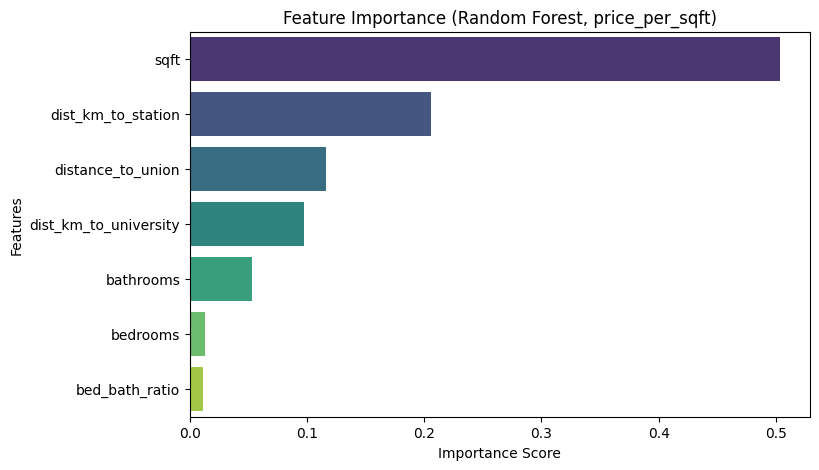

sqft                     0.503844
dist_km_to_station       0.205379
distance_to_union        0.116316
dist_km_to_university    0.097064
bathrooms                0.052667
bedrooms                 0.013257
bed_bath_ratio           0.011472
dtype: float64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Берём обученный Random Forest на price_per_sqft
feat_imp = pd.Series(rf_pps.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")
plt.title("Feature Importance (Random Forest, price_per_sqft)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

print(feat_imp)
